In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold, cross_validate, \
    cross_val_score

from sklearn.pipeline import make_pipeline, Pipeline

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN

from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier, RUSBoostClassifier

from sklearn import set_config

import tensorflow as tf
from keras.models import Model
from keras.layers import *
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [224]:
set_config(display="diagram")

In [387]:
# load data
columns = ['MOSTYPE' , 'MAANTHUI' , 'MGEMOMV' , 'MGEMLEEF' , 'MOSHOOFD' , 'MGODRK' , 'MGODPR' , 'MGODOV' , 'MGODGE' , 'MRELGE' , 'MRELSA' , 'MRELOV' , 'MFALLEEN' , 'MFGEKIND' , 'MFWEKIND' , 'MOPLHOOG' , 'MOPLMIDD' , 'MOPLLAAG' , 'MBERHOOG' , 'MBERZELF' , 'MBERBOER' , 'MBERMIDD' , 'MBERARBG' , 'MBERARBO' , 'MSKA' , 'MSKB1' , 'MSKB2' , 'MSKC' , 'MSKD' , 'MHHUUR' , 'MHKOOP' , 'MAUT1' , 'MAUT2' , 'MAUT0' , 'MZFONDS' , 'MZPART' , 'MINKM30' , 'MINK3045' , 'MINK4575' , 'MINK7512' , 'MINK123M' , 'MINKGEM' , 'MKOOPKLA' , 'PWAPART' , 'PWABEDR' , 'PWALAND' , 'PPERSAUT' , 'PBESAUT' , 'PMOTSCO' , 'PVRAAUT' , 'PAANHANG' , 'PTRACTOR' , 'PWERKT' , 'PBROM' , 'PLEVEN' , 'PPERSONG' , 'PGEZONG' , 'PWAOREG' , 'PBRAND' , 'PZEILPL' , 'PPLEZIER' , 'PFIETS' , 'PINBOED' , 'PBYSTAND' , 'AWAPART' , 'AWABEDR' , 'AWALAND' , 'APERSAUT' , 'ABESAUT' , 'AMOTSCO' , 'AVRAAUT' , 'AAANHANG' , 'ATRACTOR' , 'AWERKT' , 'ABROM' , 'ALEVEN' , 'APERSONG' , 'AGEZONG:' , 'AWAOREG' , 'ABRAND' , 'AZEILPL' , 'APLEZIER' , 'AFIETS' , 'AINBOED' , 'ABYSTAND' , 'CARAVAN']

df = pd.read_csv('data/ticdata2000.txt', names= columns, sep='\t')
df_test = pd.read_csv('data/ticeval2000.txt', names= columns[:-1], sep='\t')

In [226]:
print(f'df len: {len(df)}\nn_cols: {len(df.columns)}')

df len: 5822
n_cols: 86


In [228]:
# check for the different ranges
[print(f'{col}: {sorted(pd.unique(df[col]))}') for col in df.columns]

MOSTYPE: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
MAANTHUI: [1, 2, 3, 4, 5, 6, 7, 8, 10]
MGEMOMV: [1, 2, 3, 4, 5]
MGEMLEEF: [1, 2, 3, 4, 5, 6]
MOSHOOFD: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
MGODRK: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MGODPR: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MGODOV: [0, 1, 2, 3, 4, 5]
MGODGE: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MRELGE: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MRELSA: [0, 1, 2, 3, 4, 5, 6, 7]
MRELOV: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MFALLEEN: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MFGEKIND: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MFWEKIND: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MOPLHOOG: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MOPLMIDD: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MOPLLAAG: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MBERHOOG: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MBERZELF: [0, 1, 2, 3, 4, 5]
MBERBOER: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MBERMIDD: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MBERARBG: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
MBERARBO: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [364]:
# add some extra features like in the previous comp and also onehot encode non ordinal ones
def add_features(df):
    perc_cols = [col for col in df. columns if (col[0] == 'M') and (col not in ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD'])]

    for col in perc_cols:
        df[f'ALL_{col}'] = (df[col] == 9) * 1
        df[f'NONE_{col}'] = (df[col] == 0) * 1

    insu_cols = [col for col in df. columns if (col[0] != 'M') if len(pd.unique(df[col])) > 3]

    for col in insu_cols:
        df[f'HASALOT_{col}'] = (df[col] > 2) * 1

    df = pd.get_dummies(df, columns=['MOSTYPE', 'MOSHOOFD'])

    return df

In [389]:
df_test['CARAVAN'] = np.zeros((len(df_test), 1))
df_cc = pd.concat([df, df_test], axis=0)

df_cc = add_features(df_cc)

df_test = df_cc.iloc[len(df):, :]
df = df_cc.iloc[:len(df), :]

C:\Users\gyenist\AppData\Local\Temp\ipykernel_8344\2807655682.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'HASALOT_{col}'] = (df[col] > 2) * 1
C:\Users\gyenist\AppData\Local\Temp\ipykernel_8344\2807655682.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'HASALOT_{col}'] = (df[col] > 2) * 1
C:\Users\gyenist\AppData\Local\Temp\ipykernel_8344\2807655682.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

In [366]:
df

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,...,MOSHOOFD_1,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9,MOSHOOFD_10
0,1,3,2,0,5,1,3,7,0,2,...,0,0,0,0,0,0,0,1,0,0
1,1,2,2,1,4,1,4,6,2,2,...,0,0,0,0,0,0,0,1,0,0
2,1,2,2,0,4,2,4,3,2,4,...,0,0,0,0,0,0,0,1,0,0
3,1,3,3,2,3,2,4,5,2,2,...,0,0,1,0,0,0,0,0,0,0
4,1,4,2,1,4,1,4,7,1,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,1,2,0,6,1,2,1,2,6,...,0,0,0,0,0,0,0,1,0,0
5818,1,4,4,1,4,1,4,6,0,3,...,0,0,0,0,0,0,0,1,0,0
5819,1,3,4,0,6,0,3,5,1,4,...,0,0,0,0,0,0,0,1,0,0
5820,1,3,2,0,7,0,2,7,2,0,...,0,0,0,0,0,0,0,1,0,0


## MODELING

For the random forest model, I use the suggested pipeline architecture with a sampler and a classifier, which I optimize via grid search.

In [442]:
# get arrays
y_train = df['CARAVAN'].values
X_train = df.drop(['CARAVAN'], axis=1).values

In [396]:
X_train.shape, y_train.shape

((5822, 239), (5822,))

In [397]:
# define cross validation
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
scorer = make_scorer(balanced_accuracy_score)

In [398]:
# define pipeline
pipe = imbPipeline([
    ('sampler', RandomOverSampler()),
    ('rf', RandomForestClassifier())
])

In [274]:
# check tunable params
pipe.get_params()

{'memory': None,
 'steps': [('sampler', RandomOverSampler()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'sampler': RandomOverSampler(),
 'rf': RandomForestClassifier(),
 'sampler__random_state': None,
 'sampler__sampling_strategy': 'auto',
 'sampler__shrinkage': None,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

In [486]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sampler', RandomOverSampler()),
                ('rf', RandomForestClassifier())])

### Hyperparameter Tuning

I first tried a robust grid search with many hyperparameters to optimize which ran for 2 days. From that it turned out, that the simple RanodomOverSampler is the best sampling method for this task. Then, I tried a simple cost complexity pruning. In the below code I narrowed down the optimization to the cost complexity pruning alpha parameter and the number of base estimators.

In [318]:
params_ccp = {
    'sampler': [RandomOverSampler()],
    'rf__n_estimators': [250, 300, 350, 400],
    'rf__ccp_alpha': list(np.arange(.004, .01, .002)),
    'rf__class_weight':['balanced']
}

In [319]:
clf_ccp = GridSearchCV(pipe, params_ccp, scoring='balanced_accuracy', verbose=3, cv=kf)
clf_ccp.fit(X_train, y_train)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
[CV 1/15] END rf__ccp_alpha=0.004, rf__class_weight=balanced, rf__n_estimators=250, sampler=RandomOverSampler();, score=0.696 total time=   2.8s
[CV 2/15] END rf__ccp_alpha=0.004, rf__class_weight=balanced, rf__n_estimators=250, sampler=RandomOverSampler();, score=0.685 total time=   2.7s
[CV 3/15] END rf__ccp_alpha=0.004, rf__class_weight=balanced, rf__n_estimators=250, sampler=RandomOverSampler();, score=0.674 total time=   2.7s
[CV 4/15] END rf__ccp_alpha=0.004, rf__class_weight=balanced, rf__n_estimators=250, sampler=RandomOverSampler();, score=0.760 total time=   2.7s
[CV 5/15] END rf__ccp_alpha=0.004, rf__class_weight=balanced, rf__n_estimators=250, sampler=RandomOverSampler();, score=0.702 total time=   2.7s
[CV 6/15] END rf__ccp_alpha=0.004, rf__class_weight=balanced, rf__n_estimators=250, sampler=RandomOverSampler();, score=0.672 total time=   2.7s
[CV 7/15] END rf__ccp_alpha=0.004, rf__class_weight=balanced, rf__n

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('sampler', RandomOverSampler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__ccp_alpha': [0.004, 0.006, 0.008],
                         'rf__class_weight': ['balanced'],
                         'rf__n_estimators': [250, 300, 350, 400],
                         'sampler': [RandomOverSampler()]},
             scoring='balanced_accuracy', verbose=3)

In [320]:
clf_ccp.best_params_

{'rf__ccp_alpha': 0.008,
 'rf__class_weight': 'balanced',
 'rf__n_estimators': 350,
 'sampler': RandomOverSampler()}

In [321]:
result_df = pd.DataFrame.from_dict(clf_ccp.cv_results_, orient='columns')
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__ccp_alpha,param_rf__class_weight,param_rf__n_estimators,param_sampler,params,split0_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,2.799157,0.054191,0.037666,0.000784,0.004,balanced,250,RandomOverSampler(),"{'rf__ccp_alpha': 0.004, 'rf__class_weight': '...",0.695988,...,0.702740,0.694032,0.704501,0.705251,0.661823,0.692297,0.706999,0.699027,0.022767,8
1,3.398570,0.174663,0.044864,0.001360,0.004,balanced,300,RandomOverSampler(),"{'rf__ccp_alpha': 0.004, 'rf__class_weight': '...",0.678343,...,0.705877,0.685061,0.697358,0.708447,0.697201,0.683224,0.710029,0.696667,0.017876,10
2,3.960130,0.091038,0.052406,0.001143,0.004,balanced,350,RandomOverSampler(),"{'rf__ccp_alpha': 0.004, 'rf__class_weight': '...",0.686106,...,0.702740,0.679120,0.693249,0.702674,0.684534,0.676037,0.711857,0.694767,0.019979,12
3,4.629340,0.181234,0.064189,0.013076,0.004,balanced,400,RandomOverSampler(),"{'rf__ccp_alpha': 0.004, 'rf__class_weight': '...",0.685192,...,0.695434,0.695116,0.706784,0.706915,0.681735,0.698690,0.713685,0.699370,0.020369,7
4,2.849528,0.148892,0.037266,0.005495,0.006,balanced,250,RandomOverSampler(),"{'rf__ccp_alpha': 0.006, 'rf__class_weight': '...",0.688845,...,0.709410,0.677292,0.706327,0.699022,0.691265,0.697260,0.717459,0.700299,0.016845,4
5,3.458132,0.180244,0.044270,0.004714,0.006,balanced,300,RandomOverSampler(),"{'rf__ccp_alpha': 0.006, 'rf__class_weight': '...",0.692792,...,0.691721,0.688091,0.700685,0.706458,0.694064,0.692754,0.710603,0.699543,0.017433,6
6,3.858403,0.096317,0.047990,0.001261,0.006,balanced,350,RandomOverSampler(),"{'rf__ccp_alpha': 0.006, 'rf__class_weight': '...",0.697195,...,0.703077,0.681405,0.705708,0.688389,0.680881,0.693151,0.721402,0.698701,0.019814,9
7,4.395591,0.075700,0.055268,0.001474,0.006,balanced,400,RandomOverSampler(),"{'rf__ccp_alpha': 0.006, 'rf__class_weight': '...",0.693085,...,0.694858,0.673231,0.695532,0.701598,0.685845,0.703534,0.704832,0.696302,0.018543,11
8,2.803303,0.074578,0.034072,0.000855,0.008,balanced,250,RandomOverSampler(),"{'rf__ccp_alpha': 0.008, 'rf__class_weight': '...",0.687019,...,0.714711,0.675921,0.708611,0.701892,0.683621,0.716260,0.709232,0.699744,0.020151,5
9,3.334080,0.104616,0.043403,0.009054,0.008,balanced,300,RandomOverSampler(),"{'rf__ccp_alpha': 0.008, 'rf__class_weight': '...",0.704044,...,0.703931,0.680491,0.707828,0.707371,0.685845,0.708497,0.715461,0.701162,0.016696,2


<AxesSubplot: xlabel='param_rf__ccp_alpha', ylabel='mean_test_score'>

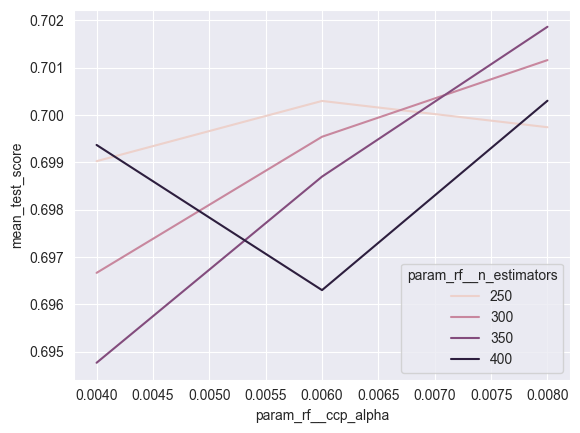

In [322]:
sns.lineplot(data=result_df, x='param_rf__ccp_alpha', y='mean_test_score', hue='param_rf__n_estimators')

We can see no platoe, so we should search for possible higher alpha..

In [324]:
params_ccp = {
    'sampler': [RandomOverSampler()],
    'rf__n_estimators': [350],
    'rf__ccp_alpha': list(np.arange(.006, .02, .002)),
    'rf__class_weight': ['balanced']
}
clf_ccp = GridSearchCV(pipe, params_ccp, scoring='balanced_accuracy', verbose=3, cv=kf, n_jobs=-1)
clf_ccp.fit(X_train, y_train)

Fitting 15 folds for each of 7 candidates, totalling 105 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('sampler', RandomOverSampler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__ccp_alpha': [0.006, 0.008, 0.01, 0.012, 0.014,
                                           0.016, 0.018000000000000002],
                         'rf__class_weight': ['balanced'],
                         'rf__n_estimators': [350],
                         'sampler': [RandomOverSampler()]},
             scoring='balanced_accuracy', verbose=3)

<AxesSubplot: xlabel='param_rf__ccp_alpha', ylabel='mean_test_score'>

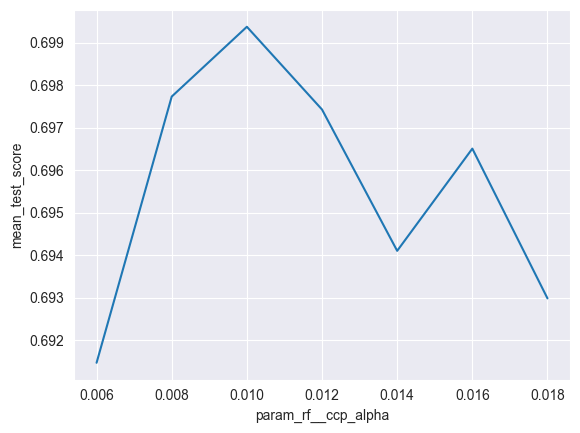

In [325]:
result_df = pd.DataFrame.from_dict(clf_ccp.cv_results_, orient='columns')
result_df
sns.lineplot(data=result_df, x='param_rf__ccp_alpha', y='mean_test_score')

In [399]:
# final pipeline, very simple.. no big difference in final score between alpha=.008 andd .006 and also n_estimators 300 vs 350. Finally I chose the smaller model.
pipe_final = imbPipeline([
    ('sampler', RandomOverSampler()),
    ('rf', RandomForestClassifier(ccp_alpha=.006, n_estimators=300))
])

In [400]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('sampler', RandomOverSampler()),
                ('rf',
                 RandomForestClassifier(ccp_alpha=0.006, n_estimators=300))])

In [411]:
scores = np.mean(cross_val_score(pipe_final, X_train, y_train, scoring=scorer, cv=kf, verbose=5))
print(scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.677) total time=   3.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] END ................................ score: (test=0.674) total time=   3.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


[CV] END ................................ score: (test=0.711) total time=   3.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s remaining:    0.0s


[CV] END ................................ score: (test=0.667) total time=   3.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.7s remaining:    0.0s


[CV] END ................................ score: (test=0.725) total time=   3.3s
[CV] END ................................ score: (test=0.709) total time=   3.4s
[CV] END ................................ score: (test=0.705) total time=   3.6s
[CV] END ................................ score: (test=0.706) total time=   3.5s
[CV] END ................................ score: (test=0.701) total time=   3.4s
[CV] END ................................ score: (test=0.652) total time=   3.3s
[CV] END ................................ score: (test=0.739) total time=   3.3s
[CV] END ................................ score: (test=0.654) total time=   3.3s
[CV] END ................................ score: (test=0.723) total time=   3.4s
[CV] END ................................ score: (test=0.704) total time=   3.3s
[CV] END ................................ score: (test=0.699) total time=   3.2s
0.6964247410634276


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   51.9s finished


In [431]:
# get and save preds for submission
X_test = df_test.drop(['CARAVAN'], axis=1).values

In [413]:
preds = pipe_final.predict(X_test)

In [414]:
df_preds_rf = pd.Series(preds.astype('uint8'))

In [415]:
df_preds_rf.to_csv('data/dm_competition2_tamas_gyenis_submission1.txt', header=0, index=None)

## Freestyle

For this I use a simple neural network trained on all the available train data. I experimented with ensemble voting models of XGB and SVC and so on, but those had worse performance than the tuned RF, so I resolted to the DNN, which I like.

In [443]:
# balance data using the oversampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

# scale for easier convergence
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# split
X_train, X_eval, y_train, y_eval = train_test_split(X_res, y_res, test_size=0.2)

In [444]:
X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((8758, 239), (8758,), (2190, 239), (2190,))

In [434]:
# for reusability wrap into a func
def build(input_shape):
    inp = Input(shape=input_shape)
    x = Dense(1000, activation='swish')(inp)
    x = Dropout(.5)(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(.2)(x)
    out = Dense(1, activation='')(x)

    model = Model(inputs=inp, outputs=out)
    model.compile(optimizer='adam', loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=2.0, from_logits=False, label_smoothing=.05), metrics='accuracy')

    print(model.summary())

    return model

In [435]:
# define a checkpont callback
callbacks = [
    ModelCheckpoint(f'./data/DL/model_weights_best.h5',
                             monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')
]
# get the model
model = build(X_train.shape[-1])

# fit
hist = model.fit(x=X_train,
                 y=y_train,
                 validation_data=(X_eval, y_eval),
                 epochs=150,
                 batch_size=128,
                 callbacks=callbacks,
                 verbose=1)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 239)]             0         
                                                                 
 dense_36 (Dense)            (None, 1000)              240000    
                                                                 
 dropout_24 (Dropout)        (None, 1000)              0         
                                                                 
 dense_37 (Dense)            (None, 100)               100100    
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 dense_38 (Dense)            (None, 1)                 101       
                                                                 
Total params: 340,201
Trainable params: 340,201
Non-traina

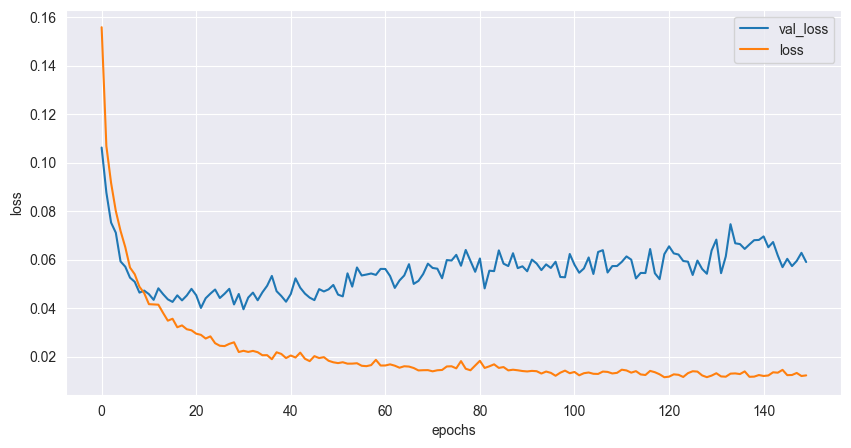

In [436]:
plt.figure(10, (10, 5))
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['val_loss', 'loss'])

We can see overfit starts at around 40ep.

In [447]:
X_train.shape, X_eval.shape

((8758, 239), (2190, 239))

In [450]:
# train on all the available data for 40 ep
X_train_all = np.vstack((X_train, X_eval))
y_train_all = np.vstack((y_train.reshape(-1, 1), y_eval.reshape(-1, 1)))

In [482]:
model = build(X_train.shape[-1])

# fit
hist = model.fit(x=X_train_all,
                 y=y_train_all,
                 epochs=40,
                 batch_size=128,
                 verbose=1)

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 239)]             0         
                                                                 
 dense_45 (Dense)            (None, 1000)              240000    
                                                                 
 dropout_30 (Dropout)        (None, 1000)              0         
                                                                 
 dense_46 (Dense)            (None, 100)               100100    
                                                                 
 dropout_31 (Dropout)        (None, 100)               0         
                                                                 
 dense_47 (Dense)            (None, 1)                 101       
                                                                 
Total params: 340,201
Trainable params: 340,201
Non-traina

In [483]:
# prepare preds for submission
preds = model.predict(X_test)

125/125 [==============================] - 0s 1ms/step


In [484]:
preds_cat = np.round(tf.sigmoid(preds))

In [485]:
df_preds_rf = pd.Series(np.squeeze(preds_cat).astype('uint8'))
df_preds_rf.to_csv('data/dm_competition2_tamas_gyenis_submission2.txt', header=0, index=None)